Data Taken From: 
http://headit.ucsd.edu/studies/9d557882-a236-11e2-9420-0050563f2612


In [1]:
import mne
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

## Load Data

In [3]:
data_dir = path.join('home', 'nicholas', 'Downloads')
bdf_filename = 'eeg_recording_1 (1).bdf'

raw = mne.io.read_raw_edf('/' + path.join(data_dir, bdf_filename))

Extracting edf Parameters from /home/nicholas/Downloads/eeg_recording_1 (1).bdf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


## Get Events


Reading 0 ... 954623  =      0.000 ...  3728.996 secs...


/usr/local/lib/python2.7/dist-packages/scipy/special/__init__.py:627: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._ufuncs import *
/usr/local/lib/python2.7/dist-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/usr/local/lib/python2.7/dist-packages/scipy/spatial/__init__.py:92: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .ckdtree import *
/usr/local/lib/python2.7/dist-packages/scipy/spatial/__init__.py:93: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .qhull import *


[done]
Removing orphaned offset at the beginning of the file.
4455 events found
Events id: [    1     2    10    11    20    21    25   100   101   150   151   200
   201   250   251  4096 65536]


/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 1 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 2 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 10 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 11 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 20 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 21 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/viz/misc.py:453: UserWarning: event 25 missing from event_id will be ignored.
  % this_event)
/usr/local/lib/python2.7/dist-packages/mne/

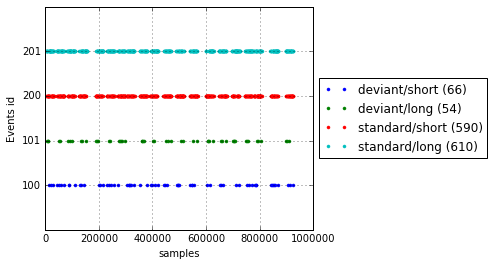

In [4]:
events = mne.find_events(raw)
event_id = {'standard/short': 200, 'standard/long': 201, 'deviant/short': 100, 'deviant/long': 101}

_ = mne.viz.plot_events(events, event_id=event_id)

## Pick out data

In [5]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)
picks = picks[::50]
picks

array([  0,  50, 100, 150, 200, 250])

In [6]:
tmin, tmax = -0.2, 0.5
baseline = (None, 0.0)

epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, picks=picks)


1320 matching events found
Adding average EEG reference projection.
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [7]:
epochs_dev = epochs['deviant']
epochs_dev

<Epochs  |  n_events : 120 (good & bad), tmin : -0.19921875 (s), tmax : 0.5 (s), baseline : (None, 0),
 'deviant/long': 54, 'deviant/short': 66>

In [8]:
epochs_std = epochs['standard']
epochs_std

<Epochs  |  n_events : 1200 (good & bad), tmin : -0.19921875 (s), tmax : 0.5 (s), baseline : (None, 0),
 'standard/long': 610, 'standard/short': 590>

In [9]:
evoked_dev = epochs_dev.average(picks=[20, 30])
evoked_std = epochs_std.average(picks=[20, 30])

Reading 5719 ... 5898  =     22.340 ...    23.039 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 10130 ... 10309  =     39.570 ...    40.270 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 11320 ... 11499  =     44.219 ...    44.918 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 14885 ... 15064  =     58.145 ...    58.844 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 19372 ... 19551  =     75.672 ...    76.371 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 30216 ... 30395  =    118.031 ...   118.730 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 44824 ... 45003  =    175.094 ...   175.793 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 49234 ... 49413  =    192.320 ...   193.020 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 50460 ... 50639  =    197.109 ...   197.809 secs...
[done]
Applying baseline correction ..

IndexError: list index out of range

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
_ = evoked_std.plot(axes=axes[0])


In [ ]:
_ = evoked_dev.plot()

In [ ]:
dev = evoked_dev.copy()
dev.detrend()
dev.plot()

In [ ]:
std = evoked_std.copy()
std.detrend()
std.plot()

In [ ]:
epochs_dev.

In [ ]:
df = epochs_dev.to_data_frame()
df.head()

In [ ]:
data_dev = epochs_dev.get_data()
data_std = epochs_std.get_data()

In [ ]:
data_dev.shape

In [ ]:
data_std.shape

In [ ]:
chnum = 4
dd = data_dev[:, chnum, :]
ss = data_std[:, chnum, :]
plt.figure(chnum)
plt.plot(np.mean(dd, axis=0))
plt.plot(np.mean(ss, axis=0))

Now, the trials are in the **dd** and **ss** numpy arrays

In [ ]:
times = evoked_dev.times
times.shape

## Okay, All the data I need for the homework is here.  Now to shuffle it up...

In [ ]:
dd.shape

In [ ]:
s_code = np.ones(ss.shape[0]) * 151
d_code = np.ones(dd.shape[0]) * 251
all_trials = np.vstack((dd, ss))
all_codes = np.hstack((d_code, s_code))

In [ ]:
all_codes.shape

In [ ]:
all_trials.shape

In [ ]:
new_order = np.random.permutation(np.arange(all_trials.shape[0]))
new_order

In [ ]:
trials_shuffled = all_trials[new_order, :]
codes_shuffled = all_codes[new_order]


## Randomly Un-baseline the data

In [ ]:
new_offsets = np.random.randn(all_trials.shape[0])
new_offsets * np.std(all_trials)

trials_shuffled_offset = (trials_shuffled.T + new_offsets).T

In [ ]:
trials_shuffled_offset.shape

## ... and save it in a .mat file!

In [ ]:
from scipy import io

In [ ]:

home_data = {'eeg': trials_shuffled_offset,
             'trial_labels': codes_shuffled,
             'trial_time': times}

save_dir = path.join('Homework Sample Data', 'Homework 4')
# save_file = 

import pickle
with open('eeg_data.p') as data_file:
    pickle.dump(home_data, data_file)
    
io.savemat(path.join(save_dir, 'eeg_data.mat'), home_data)

In [ ]:
io.whosmat(path.join(save_dir, 'eeg_data.mat'))

In [ ]:
loaded = io.loadmat(path.join(save_dir, 'eeg_data.mat'))

In [ ]:
loaded